In [123]:
!pip install tensorflow==2.13.0
!pip install scikit-learn==1.3.0

In [124]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [125]:
# Ler arquivo
df_final = pd.read_csv('/home/linguica/isabelle/sprint3/modelo/df_completoV3.csv')

In [126]:
df_final.head()

,KNR,STATUS,DATA,TempoR750,TempoL540,TempoG700,TempoM600,TempoM700,R750,L540,G700,M600,M700,FALHAS
0,2023-4026002,R750,2023-09-29 08:16:23,3 days 01:04:05,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
1,2023-4026002,L540,2023-10-02 09:20:28,0 days 00:00:00,1 days 01:25:34,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
2,2023-4026002,G700,2023-10-03 10:46:02,0 days 00:00:00,0 days 00:00:00,0 days 01:35:52,0 days 00:00:00,0 days,1,1,1,1,1,1
3,2023-4026002,M600,2023-10-03 12:21:54,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 01:09:42,0 days,1,1,1,1,1,1
4,2023-4026002,M700,2023-10-03 13:31:36,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1


# LSTM com dimensão de tempo

In [127]:
df_final.columns

Index(['KNR', 'STATUS', 'DATA', 'TempoR750', 'TempoL540', 'TempoG700',
       'TempoM600', 'TempoM700', 'R750', 'L540', 'G700', 'M600', 'M700',
       'FALHAS'],
      dtype='object')

In [128]:
df_final

,KNR,STATUS,DATA,TempoR750,TempoL540,TempoG700,TempoM600,TempoM700,R750,L540,G700,M600,M700,FALHAS
0,2023-4026002,R750,2023-09-29 08:16:23,3 days 01:04:05,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
1,2023-4026002,L540,2023-10-02 09:20:28,0 days 00:00:00,1 days 01:25:34,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
2,2023-4026002,G700,2023-10-03 10:46:02,0 days 00:00:00,0 days 00:00:00,0 days 01:35:52,0 days 00:00:00,0 days,1,1,1,1,1,1
3,2023-4026002,M600,2023-10-03 12:21:54,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 01:09:42,0 days,1,1,1,1,1,1
4,2023-4026002,M700,2023-10-03 13:31:36,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130131,2024-1916086,M700,2024-04-05 12:05:17,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,0,1,1,1,1
130132,2024-2016184,R750,2024-03-21 17:53:25,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,0,1,1,1,1
130133,2024-2016184,G700,2024-04-10 14:15:40,0 days 00:00:00,0 days 00:00:00,4 days 21:32:52,0 days 00:00:00,0 days,1,0,1,1,1,1
130134,2024-2016184,M600,2024-04-15 11:48:32,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:01,0 days,1,0,1,1,1,1


In [130]:
df_final.drop(columns=['STATUS', 'DATA'])

,KNR,TempoR750,TempoL540,TempoG700,TempoM600,TempoM700,R750,L540,G700,M600,M700,FALHAS
0,2023-4026002,3 days 01:04:05,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
1,2023-4026002,0 days 00:00:00,1 days 01:25:34,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
2,2023-4026002,0 days 00:00:00,0 days 00:00:00,0 days 01:35:52,0 days 00:00:00,0 days,1,1,1,1,1,1
3,2023-4026002,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 01:09:42,0 days,1,1,1,1,1,1
4,2023-4026002,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
130131,2024-1916086,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,0,1,1,1,1
130132,2024-2016184,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,0,1,1,1,1
130133,2024-2016184,0 days 00:00:00,0 days 00:00:00,4 days 21:32:52,0 days 00:00:00,0 days,1,0,1,1,1,1
130134,2024-2016184,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:01,0 days,1,0,1,1,1,1


In [133]:
# Converter as colunas individualmente para timedelta
df_final['TempoR750'] = pd.to_timedelta(df_final['TempoR750'])
df_final['TempoL540'] = pd.to_timedelta(df_final['TempoL540'])
df_final['TempoG700'] = pd.to_timedelta(df_final['TempoG700'])
df_final['TempoM600'] = pd.to_timedelta(df_final['TempoM600'])
df_final['TempoM700'] = pd.to_timedelta(df_final['TempoM700'])

# Lista de colunas para converter
colunas_tempo = ['TempoR750', 'TempoL540', 'TempoG700', 'TempoM600', 'TempoM700']

# Aplicar pd.to_timedelta a cada coluna
for coluna in colunas_tempo:
    df_final[coluna] = pd.to_timedelta(df_final[coluna])


In [134]:
df_final

,KNR,STATUS,DATA,TempoR750,TempoL540,TempoG700,TempoM600,TempoM700,R750,L540,G700,M600,M700,FALHAS
0,2023-4026002,R750,2023-09-29 08:16:23,3 days 01:04:05,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
1,2023-4026002,L540,2023-10-02 09:20:28,0 days 00:00:00,1 days 01:25:34,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
2,2023-4026002,G700,2023-10-03 10:46:02,0 days 00:00:00,0 days 00:00:00,0 days 01:35:52,0 days 00:00:00,0 days,1,1,1,1,1,1
3,2023-4026002,M600,2023-10-03 12:21:54,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 01:09:42,0 days,1,1,1,1,1,1
4,2023-4026002,M700,2023-10-03 13:31:36,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130131,2024-1916086,M700,2024-04-05 12:05:17,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,0,1,1,1,1
130132,2024-2016184,R750,2024-03-21 17:53:25,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,1,0,1,1,1,1
130133,2024-2016184,G700,2024-04-10 14:15:40,0 days 00:00:00,0 days 00:00:00,4 days 21:32:52,0 days 00:00:00,0 days,1,0,1,1,1,1
130134,2024-2016184,M600,2024-04-15 11:48:32,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:01,0 days,1,0,1,1,1,1


In [136]:
# Converter os tempos para segundos e depois para minutos
for coluna in colunas_tempo:
    df_final[coluna] = df_final[coluna].dt.total_seconds()  # Converter para segundos
    df_final[coluna] = df_final[coluna] / 60  # Converter para minutos

In [137]:
df_final.head()

,KNR,STATUS,DATA,TempoR750,TempoL540,TempoG700,TempoM600,TempoM700,R750,L540,G700,M600,M700,FALHAS
0,2023-4026002,R750,2023-09-29 08:16:23,4384.083333,0.000000,0.000000,0.0,0.0,1,1,1,1,1,1
1,2023-4026002,L540,2023-10-02 09:20:28,0.000000,1525.566667,0.000000,0.0,0.0,1,1,1,1,1,1
2,2023-4026002,G700,2023-10-03 10:46:02,0.000000,0.000000,95.866667,0.0,0.0,1,1,1,1,1,1
3,2023-4026002,M600,2023-10-03 12:21:54,0.000000,0.000000,0.000000,69.7,0.0,1,1,1,1,1,1
4,2023-4026002,M700,2023-10-03 13:31:36,0.000000,0.000000,0.000000,0.0,0.0,1,1,1,1,1,1


In [139]:
X = df_final[['TempoR750', 'TempoL540', 'TempoG700', 'TempoM600', 'TempoM700', 'R750', 'L540', 'G700', 'M600', 'M700']].values
# X = df[['KNR', 'Nvezes718', 'SomaTempo718', 'Nvezes2', 'SomaTempo2', 'Nvezes1', 'SomaTempo1', 'NfalhasZP5', 'NfalhasZP6']].values

Y = df_final['FALHAS'].values

In [140]:
Y

array([1, 1, 1, ..., 1, 1, 1])

In [141]:
X = np.expand_dims(X, axis=1)  # Adicionando uma dimensão de tempo

In [142]:
print(f'X_train dtype: {X_train.dtype}')

X_train dtype: float64


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [144]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

In [145]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


2603/2603 [==============================] - 4s 1ms/step - loss: 0.0135 - accuracy: 0.9990 - val_loss: 2.0355e-05 - val_accuracy: 1.0000
Epoch 2/100
2603/2603 [==============================] - 2s 941us/step - loss: 2.3255e-05 - accuracy: 1.0000 - val_loss: 2.9526e-06 - val_accuracy: 1.0000
Epoch 3/100
2603/2603 [==============================] - 2s 947us/step - loss: 5.0041e-06 - accuracy: 1.0000 - val_loss: 6.7277e-07 - val_accuracy: 1.0000
Epoch 4/100
2603/2603 [==============================] - 2s 933us/step - loss: 1.3048e-06 - accuracy: 1.0000 - val_loss: 1.7057e-07 - val_accuracy: 1.0000
Epoch 5/100
2603/2603 [==============================] - 2s 947us/step - loss: 4.3308e-07 - accuracy: 1.0000 - val_loss: 4.1218e-08 - val_accuracy: 1.0000
Epoch 6/100
2603/2603 [==============================] - 2s 922us/step - loss: 1.4141e-07 - accuracy: 1.0000 - val_loss: 1.1189e-08 - val_accuracy: 1.0000
Epoch 7/100
2603/2603 [==============================] - 3s 967us/step - loss: 4.2836e-0

In [146]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Previsões
predictions = model.predict(X_test)

  1/814 [..............................] - ETA: 7s - loss: 4.7263e-13 - accuracy: 1.0000

814/814 [==============================] - 0s 344us/step - loss: 7.0659e-13 - accuracy: 1.0000
Test Accuracy: 1.00
814/814 [==============================] - 0s 334us/step


In [147]:
predictions = model.predict(X_test)

  1/814 [..............................] - ETA: 7s

814/814 [==============================] - 0s 322us/step


In [148]:
X_test

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

       ...,

       [[0.00000000e+00, 0.00000000e+00, 4.35333333e+01, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

       [[2.71693333e+03, 0.00000000e+00, 0.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]]])

In [149]:
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [150]:
# Converter as predições para rótulos binários
predictions_binary = (predictions > 0.05).astype(int)


In [151]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculando métricas
precision = precision_score(y_test, predictions_binary)
recall = recall_score(y_test, predictions_binary)
f1 = f1_score(y_test, predictions_binary)
conf_matrix = confusion_matrix(y_test, predictions_binary)

# Exibindo as métricas
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[26028]]


In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(y_test, predictions_binary)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

# Adicionar título
plt.title('Matriz de Confusão')

# Exibir o gráfico
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [24]:
# Converter para rótulos binários
y_pred_binary = (predictions > 0.5).astype(int)

# Exibir as predições binárias
print(y_pred_binary)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [25]:
indices_com_falhas = np.where(y_pred_binary == 1)[0]

print("Índices com predição 1 (Falhas):", indices_com_falhas)
print("Predições com valor 1:", y_pred_binary[indices_com_falhas])

Índices com predição 1 (Falhas): [1358 7057]
Predições com valor 1: [[1]
 [1]]


In [26]:
# Salvar o modelo em formato HDF5
model.save('modelo_mosntro.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
import joblib

# Salvar a estrutura do modelo como JSON
model_structure = model.to_json()
with open('model_structure.json', 'w') as json_file:
    json_file.write(model_structure)

# Salvar os pesos do modelo
model.save_weights('modelo_mosntro_weights.weights.h5')

# Opcional: Salvar o caminho dos pesos usando joblib
joblib.dump('modelo_mosntro_weights.weights.h5', 'model_weights.joblib')


['model_weights.joblib']

In [28]:
from keras.models import load_model

# Carregar o modelo
model = load_model('modelo_mosntro.h5')


In [29]:
import numpy as np
from keras.models import load_model

# Exemplo entrada original no formato 2D
X_example = np.array([[0.0000e+00, 1.6000e+01, 4.0000e+01, 0.0000e+00, 4.0000e+01, 3.6926e+04, 0.0000e+00]])

# Colocando em 3D
X_example = X_example.reshape((X_example.shape[0], 1, X_example.shape[1]))

model = load_model('modelo_mosntro.h5')

prediction = model.predict(X_example)

prediction_binary = (prediction > 0.5).astype(int)

print(prediction_binary)


1/1 [==============================] - 1s 667ms/step
[[0]]


# GRU

In [113]:
from tensorflow.keras.layers import GRU, Dense, Dropout

In [114]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [115]:
# # Transformando X em 3D para o GRU: (n_amostras, n_tempos, n_features)
# X = np.expand_dims(X, axis=1)  # Adicionando uma dimensão de tempo

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [117]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout para evitar overfitting
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # Saída binária

In [118]:
# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


443/443 [==============================] - 2s 2ms/step - loss: 0.2326 - accuracy: 0.9366 - val_loss: 0.2279 - val_accuracy: 0.9396
Epoch 2/100
443/443 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.9442 - val_loss: 0.2294 - val_accuracy: 0.9396
Epoch 3/100
443/443 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9442 - val_loss: 0.2297 - val_accuracy: 0.9396
Epoch 4/100
443/443 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9442 - val_loss: 0.2279 - val_accuracy: 0.9396
Epoch 5/100
443/443 [==============================] - 0s 992us/step - loss: 0.2175 - accuracy: 0.9442 - val_loss: 0.2292 - val_accuracy: 0.9396
Epoch 6/100
443/443 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9442 - val_loss: 0.2280 - val_accuracy: 0.9396
Epoch 7/100
443/443 [==============================] - 0s 1ms/step - loss: 0.2165 - accuracy: 0.9442 - val_loss: 0.2289 - val_accuracy: 0.9396
Epoch 8/1

In [119]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

predictions = model.predict(X_test)

139/139 [==============================] - 0s 359us/step - loss: 0.2135 - accuracy: 0.9449


Test Accuracy: 0.94
139/139 [==============================] - 0s 391us/step


In [120]:
predictions_binary = (predictions > 0.5).astype(int)


In [121]:
# Calculando métricas
precision = precision_score(y_test, predictions_binary)
recall = recall_score(y_test, predictions_binary)

# Exibindo as métricas
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/home/linguica/rodrigo/EstudoDados/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(y_test, predictions_binary)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

# Adicionar título
plt.title('Matriz de Confusão')

# Exibir o gráfico
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

# Modelo não supoervisionado

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

X = df_final[['Nvezes1', 'Nvezes2', 'Nvezes718', 'SomaTempo1', 'SomaTempo2', 'SomaTempo718']].values



In [40]:

kmeans = KMeans(n_clusters=2, random_state=42)
df_final['Cluster'] = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
df_final[df_final['Cluster'] == 1]

,Unnamed: 0,KNR,Nvezes1,Nvezes2,Nvezes718,SomaTempo1,SomaTempo2,SomaTempo718,Intervalo_SomaTempo1,Intervalo_SomaTempo2,Intervalo_SomaTempo718,TemFalhaRod,Cluster
180,180,2023-2056049,8.0,24.0,112.0,0.0,4467435.0,4468302.0,NaN,1 mês - 3 meses,1 mês - 3 meses,1,1
747,747,2023-2256281,90.0,1120.0,55.0,1424978.0,5606992.0,3788968.0,1 semana - 1 mês,1 mês - 3 meses,1 mês - 3 meses,0,1
749,749,2023-2316171,12.0,452.0,24.0,2782.0,4676968.0,4443032.0,<1 dia,1 mês - 3 meses,1 mês - 3 meses,0,1
752,752,2023-2316205,48.0,1616.0,128.0,2520.0,4224072.0,4215498.0,<1 dia,1 mês - 3 meses,1 mês - 3 meses,0,1
754,754,2023-2316257,30.0,1150.0,65.0,2418.0,4687014.0,4412914.0,<1 dia,1 mês - 3 meses,1 mês - 3 meses,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45910,45910,2024-1326398,90.0,3420.0,135.0,9838.0,5542352.0,40526.0,<1 dia,1 mês - 3 meses,<1 dia,0,1
46383,46383,2024-1336386,108.0,4104.0,144.0,9610.0,5689146.0,49028.0,<1 dia,1 mês - 3 meses,<1 dia,0,1
46598,46598,2024-1346128,78.0,2886.0,91.0,9460.0,7057150.0,90718.0,<1 dia,1 mês - 3 meses,1 dia - 1 semana,0,1
47199,47199,2024-1716007,54.0,2097.0,270.0,10520.0,5664306.0,2249096.0,<1 dia,1 mês - 3 meses,1 semana - 1 mês,0,1


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


In [43]:
# Matriz de confusão
cm = confusion_matrix(df_final['TemFalhaRod'], df_final['Cluster'])

print("Matriz de Confusão:")
print(cm)


Matriz de Confusão:
[[43489  1223]
 [ 2355   139]]


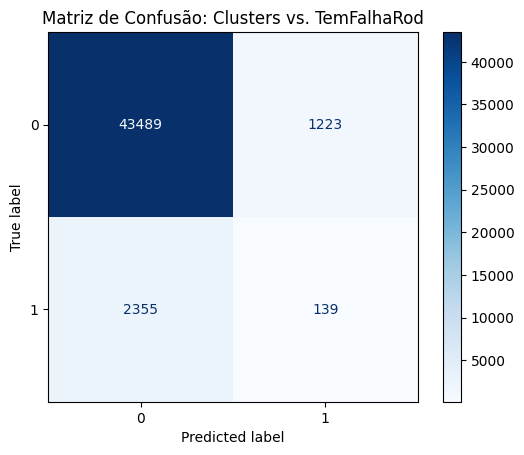

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df_final['TemFalhaRod']))
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriz de Confusão: Clusters vs. TemFalhaRod')

plt.show()


In [45]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Suponha que você tenha os rótulos verdadeiros em y_true
y_true = df_final['TemFalhaRod'].values  # Substitua pela sua coluna de rótulos verdadeiros
y_pred = df_final['Cluster'].values  # Rótulos preditos pelo K-Means

# Ajustar os rótulos preditos para corresponder aos rótulos verdadeiros
labels_adjusted = np.zeros_like(y_pred)
for i in range(2):  # Supondo que você tenha 2 clusters
    mask = (y_pred == i)
    labels_adjusted[mask] = mode(y_true[mask])[0]

# Calcular a acurácia
accuracy = accuracy_score(y_true, labels_adjusted)
print(f'Acurácia do modelo K-Means: {accuracy:}')


Acurácia do modelo K-Means: 0.9471677329153074


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import adjusted_rand_score, homogeneity_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

labels = np.where(df_final['Cluster'] == df_final['Cluster'].unique()[0], 0, 1)

# Métricas
precision = precision_score(df_final['TemFalhaRod'], labels)
recall = recall_score(df_final['TemFalhaRod'], labels)
f1 = f1_score(df_final['TemFalhaRod'], labels)
ari = adjusted_rand_score(df_final['TemFalhaRod'], df_final['Cluster'])
homogeneity = homogeneity_score(df_final['TemFalhaRod'], df_final['Cluster'])

# Mostrando métricass s
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'Adjusted Rand Index (ARI): {ari:.2f}')
print(f'Homogeneity Score: {homogeneity:.2f}')


Precision: 0.10
Recall: 0.06
F1-Score: 0.07
Adjusted Rand Index (ARI): 0.03
Homogeneity Score: 0.00
